In [ ]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 16.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
!curl -L "https://app.roboflow.com/ds/WMQAcdtDwg?key=w1H7LNKSY2" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   1167      0 --:--:-- --:--:-- --:--:--  1168
100 27.7M  100 27.7M    0     0  6871k      0  0:00:04  0:00:04 --:--:-- 9577k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/10a_jpg.rf.289e291c662286485fac67eda5cb25fd.jpg  
 extracting: train/images/10a_jpg.rf.cc7c774918c567e48407254b2ff7084f.jpg  
 extracting: train/images/10c_jpg.rf.4a86d96afa0d3744d7c4ff20dfb406c3.jpg  
 extracting: train/images/10c_jpg.rf.d6c1a54e8202fc02602bd3a90a000246.jpg  
 extracting: train/images/10d_jpg.rf.2a1d245bc50364ed3f98c168996c95b0.jpg  
 extracting: train/images/10d_jpg.rf.6c5e8c7dd64fc9cf13aaac0b329ecf4d.jpg  
 extracting: train/images/11a_jpg.rf.50ef51f

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install unrar
!unrar x /content/drive/MyDrive/Test_Data.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Test_Data.rar

Creating    Test Data                                                 OK
Extracting  Test Data/1.png                                                4%  OK 
Extracting  Test Data/11.png                                               8%  OK 
Extracting  Test Data/12.png                                              12%  OK 
Extracting  Test Data/13.png                                              16%  OK 
Extracting  Test Data/14.png                                              20%  OK 
Extracting  Test Data/15.png                                              24%  OK 
Extracting  Test Data/16.png                                              28%  OK 
Extracting  Test Data/17.png                                              33%  OK 
Extracting  Test Data/18.png                                 

# Обучение

In [ ]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8s-seg.yaml')  # build a new model from YAML
#model = YOLO('yolov8s-seg.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8s-seg.yaml').load('yolov8s.pt')  # build from YAML and transfer weights

100%|██████████| 21.5M/21.5M [00:00<00:00, 155MB/s]


Transferred 355/417 items from pretrained weights


In [ ]:
results = model.train(data='/content/data.yaml', epochs=40, imgsz=640)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/train/labels.cache... 97 images, 0 backgrounds, 0 corrupt: 100%|██████████| 97/97 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]


Plotting labels to runs/segment/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train22
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/40      5.05G     0.2656     0.3425     0.2139     0.8495          1        640: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/40       4.8G     0.3219     0.3631     0.2417     0.8129          1        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all          1          1      0.974          1      0.995      0.895      0.974          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/40      4.79G     0.3736     0.3913      0.267     0.8586          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          1          1      0.971          1      0.995      0.895      0.971          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/40      4.77G     0.3028     0.3996     0.2391     0.7816          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]

                   all          1          1      0.973          1      0.995      0.995      0.973          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/40      4.82G     0.3045     0.3717     0.2784     0.7731          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          1          1      0.972          1      0.995      0.796      0.972          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/40      4.77G     0.3096     0.3628     0.2443     0.8296          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all          1          1      0.973          1      0.995      0.895      0.973          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/40      4.82G     0.3062     0.3355     0.2398     0.8104          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          1          1      0.974          1      0.995      0.895      0.974          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/40      4.79G     0.3666       0.37     0.3018     0.8563          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/40       4.8G     0.4205     0.4366     0.2844     0.8234          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/40      4.77G     0.3802     0.3661     0.2812     0.8224          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/40      4.81G     0.3702      0.537     0.3078      0.808          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]


                   all          1          1      0.974          1      0.995      0.895      0.974          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/40      4.81G     0.3855     0.3917     0.2956     0.8522          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          1          1      0.921          1      0.995      0.895      0.921          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/40      4.79G      0.439      0.477     0.3101     0.8458          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all          1          1      0.961          1      0.995      0.895      0.961          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/40      4.81G     0.3734     0.4424     0.2949     0.8307          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/40       4.8G      0.326     0.4315     0.2642     0.8436          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/40      4.82G     0.3773     0.4735     0.2864     0.8369          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/40      4.79G     0.3301      0.404     0.2522     0.8193          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.895

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/40      4.82G     0.4062      0.444     0.2773     0.8019          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/40      4.79G     0.3222     0.4516     0.2548     0.8305          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]


                   all          1          1      0.972          1      0.995      0.995      0.972          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/40      4.82G     0.3208     0.4142     0.2624     0.7853          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/40      4.79G     0.3075     0.4232     0.2507     0.7807          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/40      4.81G     0.3158     0.3681     0.2314     0.8214          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995     0.0995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/40      4.79G     0.3383     0.6137     0.2451     0.7985          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/40      4.82G     0.3385     0.3877     0.2371     0.8201          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all          1          1       0.97          1      0.995      0.895       0.97          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/40      4.79G     0.3606     0.4106     0.2515     0.8143          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          1          1      0.973          1      0.995      0.895      0.973          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/40      4.81G     0.3342     0.4466     0.2452     0.8178          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all          1          1      0.972          1      0.995      0.895      0.972          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/40       4.8G     0.3215     0.3477     0.2468     0.7988          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


                   all          1          1      0.966          1      0.995      0.995      0.966          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/40      4.82G     0.3173     0.3824     0.2637     0.8674          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all          1          1      0.973          1      0.995      0.995      0.973          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/40      4.78G     0.3297     0.3536     0.2339     0.7831          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/40      4.81G     0.2802     0.3412     0.2176     0.8372          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/40       4.8G     0.3041     0.3685     0.2249     0.7589          1        640: 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/40      4.82G     0.3078      0.326     0.2257     0.8143          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/40      4.79G     0.2913     0.3471     0.2083     0.7664          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/40      4.81G     0.2876     0.3645     0.2208     0.8183          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/40      4.79G     0.2713     0.3346     0.2028     0.8102          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/40      4.82G      0.266     0.3249      0.202     0.7453          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/40      4.79G     0.2979     0.3644     0.2052     0.7842          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.30it/s]


                   all          1          1          1          1      0.995      0.895          1          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/40      4.82G     0.2398     0.3232     0.1837     0.7688          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.91it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/40       4.8G      0.301     0.3486     0.2658     0.8245          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/40      4.82G     0.3597     0.7047      0.221     0.9137          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995



40 epochs completed in 0.057 hours.
Optimizer stripped from runs/segment/train22/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train22/weights/best.pt, 23.8MB

Validating runs/segment/train22/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.10it/s]


                   all          1          1          1          1      0.995      0.995          1          1      0.995      0.995
Speed: 0.5ms preprocess, 27.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/train22


# Инференс

In [ ]:
def preproces_image(image_path):
    '''
    Читает изображение из пути, переводит в серое с 3 каналами
    '''
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.merge((gray_image, gray_image, gray_image))




In [ ]:
# Load a model
#model = YOLO('/content/runs/segment/train2/weights/best.pt')  # load a custom model
model = YOLO('/content/runs/segment/train/weights/best.pt')

image = preproces_image('/content/valid/images/10a_jpg.rf.b6d9406c81908b759481969f72bcc1b6.jpg')

# Predict with the model
results = model(image)  # predict on an image


0: 544x640 1 weld-area, 577.0ms
Speed: 6.6ms preprocess, 577.0ms inference, 12.4ms postprocess per image at shape (1, 3, 544, 640)


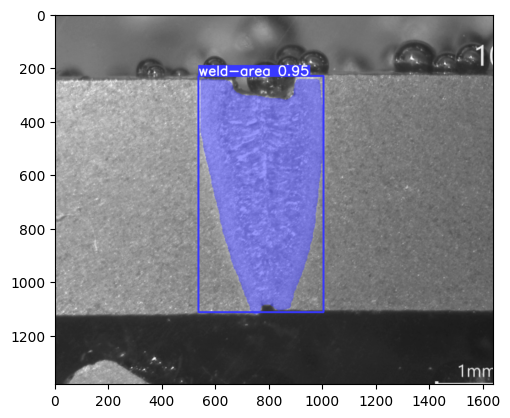

In [ ]:
plt.imshow(results[0].plot())

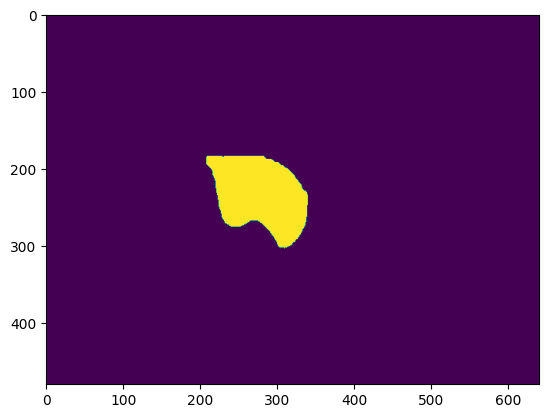

In [ ]:
masks = results[0].masks.data.cpu()
plt.imshow(masks[0])

### Постпроцессинг:

1) для каждой маски оставляем самый большой контур

2) Вычисляем центральные позиции для каждой маски, сохраняем только те, что в центре

3) Resize к оригинальному размеру

In [ ]:
def get_central_mask(boxes, masks):
    '''
    Вычисляем центральные позиции для каждой маски, сохраняет те,
    что в центре
    '''
    indexes_not_central = []
    # x, y -  центры масок
    for i, (x, y, w, h) in enumerate(boxes.xywhn.numpy()):
        center_position = np.array([x, y])
        if ((center_position < 0.35) | (center_position > 0.65)).any():
            indexes_not_central.append(i)
    # Оставляем только центральные маски
    masks = np.delete(masks, indexes_not_central, axis=0)
    return masks

def resize_masks(masks, orig_shape):
    resized_masks = []
    height, width = orig_shape[:2]
    for mask in masks:
        resized_mask = cv2.resize(mask, (width, height),
                                  interpolation = cv2.INTER_AREA)
        resized_masks.append(resized_mask)
    resized_masks = np.array(resized_masks)
    return resized_masks

def keep_largest_contour(mask):
    # Находим контуры в маске
    mask = np.array(mask, np.uint8)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        # Если контуры не были найдены, возвращаем пустую маску
        return np.zeros_like(mask)

    # Находим самый большой контур
    largest_contour = max(contours, key=cv2.contourArea)

    # Создаем новую маску и рисуем на ней только самый большой контур
    new_mask = np.zeros_like(mask)
    cv2.drawContours(new_mask, [largest_contour], -1, 1, -1)  # -1 означает, что мы рисуем внутри контура

    return new_mask


In [ ]:
def postproces(results):
    '''Постпроцессинг для масок:
    Принимает на вход выход Yolo модели
    1) Для каждой маски оставляем самый большой контур
    2) Вычисляем центральные позиции для каждой маски, сохраняет те,
    что в центре
    3) Resize к оригинальному размеру
    На выходе набор центральных масок оригинального размера np.array
    '''
    result = results[0].cpu()
    orig_shape = result.orig_img.shape
    boxes = result.boxes
    masks = result.masks.data.cpu().numpy()
    # Оставляю самый большой контур
    masks = np.array(list(map(keep_largest_contour, masks)))
    # Оставляю только центральные маски
    masks = get_central_mask(boxes, masks)
    # Возвращаю маски к разумеру изображения
    result_masks = resize_masks(masks, orig_shape)

    return result_masks

2


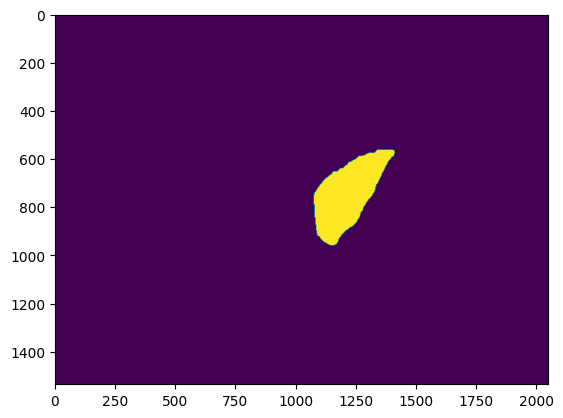

In [ ]:
result_masks = postproces(results)
print(result_masks.__len__())
plt.imshow(result_masks[1])
plt.show()